In [1]:
#suur dataset, mdea kui hea kvaliteet, aga sitaks andmeid
!pip install kagglehub
import kagglehub

path = kagglehub.dataset_download("meruvulikith/190k-spam-ham-email-dataset-for-classification")

!mv {path} .

'mv' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!move {path} .

In [2]:
import numpy as np
import pandas as pd
import ast
import importlib
SpamData= pd.read_csv("spam_Emails_data.csv")

In [3]:
SpamData["label"]=SpamData["label"].apply(lambda x: 0 if x=="Ham" else 1)
SpamData["text"]=SpamData["text"].apply(lambda x:x if not isinstance(x, (int, float, complex)) and not isinstance(x, bool) else str(x)) 

In [6]:
SpamDataModel= SpamData.copy()
SpamDataModel2= SpamData.copy()
SpamDataAnalyse = SpamData.copy()

In [ ]:
# NEURAL

#PRAEGU TRAIN SPAMDATAMODEL JA TEST SPAMDATATEST





In [7]:
#Uus
import Model
importlib.reload(Model)
Neural, Nvector=Model.Neural_Model(SpamDataModel)


c:\Users\anold\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1948/1948 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9284 - loss: 0.1677 - val_accuracy: 0.9711 - val_loss: 0.0719
Epoch 2/5
1948/1948 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.9795 - loss: 0.0512 - val_accuracy: 0.9725 - val_loss: 0.0698
Epoch 3/5
1948/1948 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9882 - loss: 0.0304 - val_accuracy: 0.9758 - val_loss: 0.0729
Epoch 4/5
1948/1948 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9913 - loss: 0.0209 - val_accuracy: 0.9759 - val_loss: 0.0847
Epoch 5/5
1948/1948 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9941 - loss: 0.0147 - val_accuracy: 0.9764 - val_loss: 0.1057
835/835 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9748 - loss: 0.1145
Test Loss: 0.10570963472127914
Test Accuracy: 0.9764097929000854
835/835 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Precision: 0.9755376542753676
Predictions: [[1]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


In [8]:
importlib.reload(Model)
Model.SaveModel({'model': Neural, 'vectorizer': Nvector},"Neural")

In [3]:
import Model
import importlib
importlib.reload(Model)
Neural, Nvector=Model.ReadModel2("Neural")

In [ ]:
##










#  RandomForest

In [9]:
import Model
importlib.reload(Model)
modelRF=Model.RandomForestModel(SpamDataModel)

Accuracy: 97.45%


In [10]:
importlib.reload(Model)
Model.SaveModel(modelRF,"RandomForestSec")

In [13]:
importlib.reload(Model)
modelRF=Model.ReadModel("RandomForestSec")

In [ ]:
##############







#SVM

In [11]:
import Model
importlib.reload(Model)
SVModel=Model.SVM_Model(SpamDataModel)

Accuracy:   96.67%


In [12]:
importlib.reload(Model)
Model.SaveModel(SVModel,"SVM")

In [ ]:
###############









##############    3 model prediction

In [21]:
import Model
importlib.reload(Model)
final_pred=Model.MajorityVotingModel(SpamDataTest, modelRF, SVModel, Neural)

6058/6058 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
Accuracy: 50.61%
Precision: 0.48


In [ ]:
#############33



#Plots



#############3

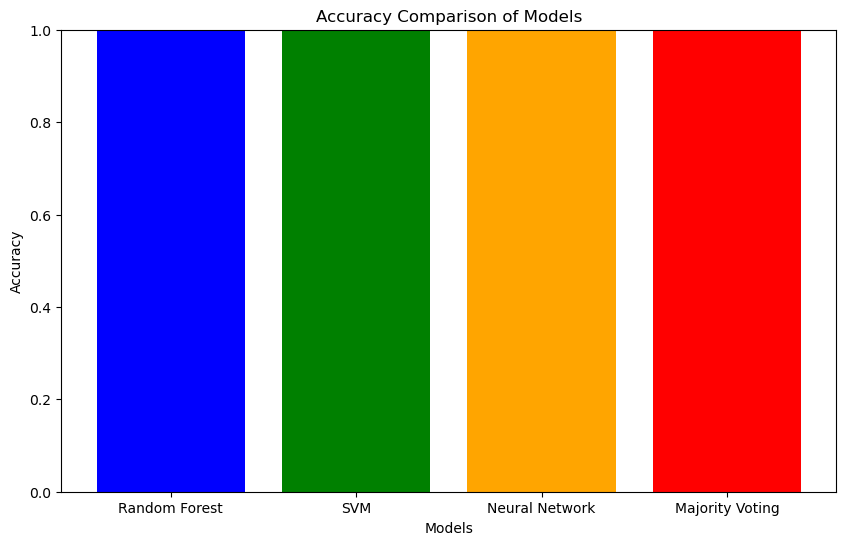

In [18]:
import matplotlib.pyplot as plt

# Accuracy
accuracies = [50, 55, 64, 80]
model_names = ['Random Forest', 'SVM', 'Neural Network', 'Majority Voting']

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.ylim(0, 1)
plt.show()

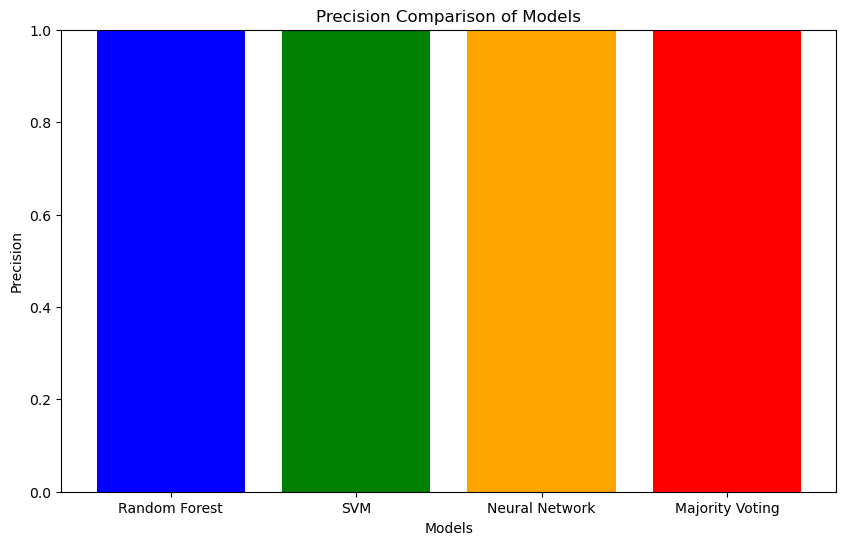

In [19]:
import matplotlib.pyplot as plt

model_names = ['Random Forest', 'SVM', 'Neural Network', 'Majority Voting']
precisions = [62,70,36,80]

plt.figure(figsize=(10, 6))
plt.bar(model_names, precisions, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Comparison of Models')
plt.ylim(0, 1)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test=SpamDataTest["label"]


# Confusion matrix for each model
cm_rf = confusion_matrix(y_test, rf_pred)
cm_svm = confusion_matrix(y_test, svm_pred)
cm_nn = confusion_matrix(y_test, nn_pred)
#cm_combined = confusion_matrix(y_test, final_pred)

# Plotting function for confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(cm_rf, 'Random Forest')
plot_confusion_matrix(cm_svm, 'SVM')
plot_confusion_matrix(cm_nn, 'Neural Network')
#plot_confusion_matrix(cm_combined, 'Majority Voting')

In [ ]:
################








###########